<a href="https://colab.research.google.com/github/khairulsholech/google-collab/blob/main/TB2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
# import file dari package google colabs
from google.colab import files 
# gunakan method upload pada files untuk mengupload file
uploades = files.upload()

Saving data.csv to data.csv


In [ ]:
# read data
df = pd.read_csv('data.csv')
df.head()

,date,time,latitude,longitude,depth,magnitude
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41


In [ ]:
df.describe()

,latitude,longitude,depth,magnitude
count,87372.000000,87372.000000,87372.000000,87372.000000
mean,-3.415577,119.213764,48.498258,3.555979
std,4.342191,10.649071,76.486725,0.794365
min,-11.000000,95.002390,1.000000,1.000000
25%,-7.930000,114.007420,10.000000,2.980000
50%,-2.900000,121.187475,15.400000,3.500000
75%,0.110000,126.845377,52.200000,4.120000
max,6.000000,140.981520,750.000000,7.920000


In [ ]:
# mencari informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87372 entries, 0 to 87371
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       87372 non-null  object 
 1   time       87372 non-null  object 
 2   latitude   87372 non-null  float64
 3   longitude  87372 non-null  float64
 4   depth      87372 non-null  float64
 5   magnitude  87372 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


In [ ]:
# cek missing value
df.isnull().sum()

date         0
time         0
latitude     0
longitude    0
depth        0
magnitude    0
dtype: int64

In [ ]:
df

,date,time,latitude,longitude,depth,magnitude
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41
...,...,...,...,...,...,...
87367,2022-09-26,22:00:50,-8.15,121.35150,10.0,3.41
87368,2022-09-26,22:08:59,0.97,125.63014,12.1,3.29
87369,2022-09-26,22:11:43,-8.27,116.71154,10.0,3.38
87370,2022-09-26,22:53:16,-8.11,121.39471,10.0,3.49


In [ ]:
# handle kolom date
# buat fitur bulan kuarter dan tahun
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# membuat kolom bulan
df['month'] = df['date'].dt.month
tempList = []

# melakukan perulangan pada kolom bulan 
for i in df['month'].tolist():
    tempVar = 0
    # melakukan pengkodisian untuk menentukan quarter seasoning
    if (i<4):
        tempVar = 1
    elif(i<7):
        tempVar = 2
    elif(i<10):
        tempVar = 3
    else:
        tempVar = 4
    # push list temp dengan tempvar
    tempList.append(tempVar)

# buat kolom quarter yang diisi dengan templist
df['quarter'] = tempList
# buat kolom tahun
df['year'] = df['date'].dt.year
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year
0,2008-11-01,00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008
1,2008-11-01,01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008
2,2008-11-01,01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008
3,2008-11-01,02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008
4,2008-11-01,02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008


In [ ]:
# handle kolom time dan membuat fitur jam, menit dan periode hari
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
# membuat kolom jam
df['hours'] = df['time'].dt.hour
# membuat kolom menit
df['minutes'] = df['time'].dt.minute
tempList = []

for i in df['hours'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Night'
    elif(i<6):
        tempVar = 'Dawn'
    elif(i<12):
        tempVar = 'Morning'
    elif(i<18):
        tempVar = 'Afternoon'
    else:
        tempVar = 'Evening'
    tempList.append(tempVar)

# membuat kolom periode hari
df['dayPeriod'] = tempList
df.head()


,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night


In [ ]:
# membuat kategori gempa
tempList = []
for i in df['magnitude'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Micro'
    elif (i<4):
        tempVar = 'Minor'
    elif (i<5):
        tempVar = 'Light'
    elif (i<6):
        tempVar = 'Moderate'
    elif (i<7):
        tempVar = 'Strong'
    elif (i<8):
        tempVar = 'Major'
    else:
        tempVar = 'Great'
    tempList.append(tempVar)
df['earthquakeCategory'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night,Micro
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night,Moderate
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night,Minor
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night,Micro
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night,Micro


In [ ]:
# buat kolom season
tempList = []
for i in df['month'].tolist():
    tempVar = ''
    if ((i>3)&(i<11)):
        tempVar = 'Dry'
    else:
        tempVar = 'Rainy'
    tempList.append(tempVar)
df['season'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory,season
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night,Micro,Rainy
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night,Moderate,Rainy
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night,Minor,Rainy
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night,Micro,Rainy
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night,Micro,Rainy


In [ ]:
# membuat kolom deep category
tempList = []
for i in df['depth'].tolist():
    tempVar = ''
    if (i<71):
        tempVar = 'Shallow'
    elif (i<301):
        tempVar = 'Intermediate'
    else:
        tempVar = 'Deep'
    tempList.append(tempVar)
df['depthCategory'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory,season,depthCategory
0,2008-11-01,1900-01-01 00:31:25,-0.60,98.89553,20.0,2.99,11,4,2008,0,31,Night,Micro,Rainy,Shallow
1,2008-11-01,1900-01-01 01:34:29,-6.61,129.38722,30.1,5.51,11,4,2008,1,34,Night,Moderate,Rainy,Shallow
2,2008-11-01,1900-01-01 01:38:14,-3.65,127.99068,5.0,3.54,11,4,2008,1,38,Night,Minor,Rainy,Shallow
3,2008-11-01,1900-01-01 02:20:05,-4.20,128.09700,5.0,2.42,11,4,2008,2,20,Night,Micro,Rainy,Shallow
4,2008-11-01,1900-01-01 02:32:18,-4.09,128.20047,10.0,2.41,11,4,2008,2,32,Night,Micro,Rainy,Shallow


In [ ]:
# membuat dataframe baru
# kolom dataframe baru
df_fix = df[['year','quarter','month','latitude','longitude','depth','magnitude','dayPeriod','earthquakeCategory','season','depthCategory']].copy()
# dataframe baru berisi data dari tahun 2010 sampai 2021
df_fix = df_fix.loc[(df_fix['year']>2010)&(df_fix['year']<2021)]
df_fix = df_fix.reset_index(drop=True)
df_fix.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory
0,2011,1,1,-7.53,120.41418,512.6,3.86,Night,Minor,Rainy,Deep
1,2011,1,1,2.32,128.25015,46.1,4.77,Night,Light,Rainy,Shallow
2,2011,1,1,0.90,122.47974,70.1,4.06,Night,Light,Rainy,Shallow
3,2011,1,1,-6.97,107.36543,31.6,3.34,Night,Minor,Rainy,Shallow
4,2011,1,1,-6.00,117.83872,10.0,3.54,Dawn,Minor,Rainy,Shallow


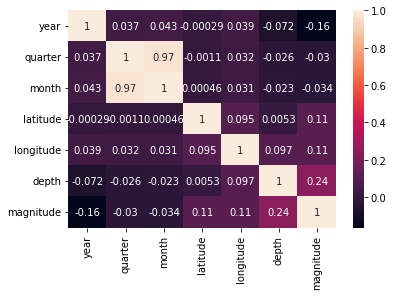

In [ ]:
correl=df_fix.corr()
sns.heatmap(correl,annot=True)

In [ ]:
# menggunakan label encoder untuk data kategorikal
encoder = LabelEncoder()
df_fix['dayPeriod'] = encoder.fit_transform(df_fix['dayPeriod'])
df_fix['earthquakeCategory'] = encoder.fit_transform(df_fix['earthquakeCategory'])
df_fix['season'] = encoder.fit_transform(df_fix['season'])
df_fix['depthCategory'] = encoder.fit_transform(df_fix['depthCategory'])
df_fix.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory
0,2011,1,1,-7.53,120.41418,512.6,3.86,4,3,1,0
1,2011,1,1,2.32,128.25015,46.1,4.77,4,0,1,2
2,2011,1,1,0.90,122.47974,70.1,4.06,4,0,1,2
3,2011,1,1,-6.97,107.36543,31.6,3.34,4,3,1,2
4,2011,1,1,-6.00,117.83872,10.0,3.54,1,3,1,2


In [ ]:
# menggunakan variabel x dan y yang nntinya digunakan untuk data train dan test
x = df_fix.drop(['depthCategory'], axis=1)
y = df_fix['depthCategory']

In [ ]:
# split data train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# menggunakan minmax scaler untuk menormalisasi data
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train
y_train

47136    2
6792     1
44950    2
28599    1
29979    1
        ..
59100    2
51795    2
6171     2
6011     2
27605    2
Name: depthCategory, Length: 42476, dtype: int64

In [ ]:
y_train

47136    2
6792     1
44950    2
28599    1
29979    1
        ..
59100    2
51795    2
6171     2
6011     2
27605    2
Name: depthCategory, Length: 42476, dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# testing predictions
y_pred_knn = knn.predict(x_test)

Text(91.68, 0.5, 'predicted label')

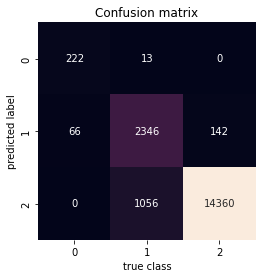

In [ ]:
# menggunakan confusion matrix untuk mengukur performa
mat = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(mat.T, square= True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class') 
plt.ylabel('predicted label')

In [ ]:
# cek persentase masing masing dari matrix
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_knn)*100))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_knn, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_knn, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_knn, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_knn, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_knn, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_knn, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_knn, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_knn, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_knn, average='weighted')))


Accuracy: 92.99

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.93
Macro Recall: 0.82
Macro F1-score: 0.86

Weighted Precision: 0.93
Weighted Recall: 0.93
Weighted F1-score: 0.93


In [ ]:
# Cek akurasi model
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       288
           1       0.92      0.69      0.79      3415
           2       0.93      0.99      0.96     14502

    accuracy                           0.93     18205
   macro avg       0.93      0.82      0.86     18205
weighted avg       0.93      0.93      0.93     18205



In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train, y_train)

#testing predictions
y_pred_kmeans = kmeans.predict(x_test)

Text(91.68, 0.5, 'predicted label')

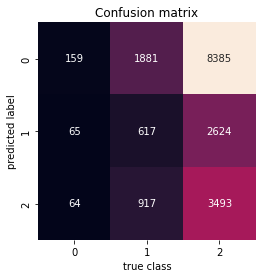

In [ ]:
# menggunakan confusion matrix untuk mengukur performa
mat = confusion_matrix(y_test, y_pred_kmeans)
sns.heatmap(mat.T, square= True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted label')

In [ ]:
# cek persentase masing masing dari matrix
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_kmeans)*100))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_kmeans, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_kmeans, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_kmeans, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_kmeans, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_kmeans, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_kmeans, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_kmeans, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_kmeans, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_kmeans, average='weighted')))


Accuracy: 23.45

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.33
Macro Recall: 0.32
Macro F1-score: 0.19

Weighted Precision: 0.66
Weighted Recall: 0.23
Weighted F1-score: 0.33


In [ ]:
# cek akurasi model
print(classification_report(y_test, y_pred_kmeans))

              precision    recall  f1-score   support

           0       0.02      0.55      0.03       288
           1       0.19      0.18      0.18      3415
           2       0.78      0.24      0.37     14502

    accuracy                           0.23     18205
   macro avg       0.33      0.32      0.19     18205
weighted avg       0.66      0.23      0.33     18205



In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

Text(91.68, 0.5, 'predicted label')

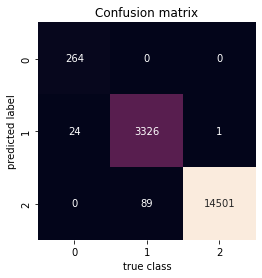

In [ ]:
# menggunakan confusion matrix untuk mengukur performa
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square= True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted label')

In [ ]:
# cek persentase masing masing dari matrix
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)*100))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 99.37

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 1.00
Macro Recall: 0.96
Macro F1-score: 0.98

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99


In [ ]:
#cek akurasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       288
           1       0.99      0.97      0.98      3415
           2       0.99      1.00      1.00     14502

    accuracy                           0.99     18205
   macro avg       1.00      0.96      0.98     18205
weighted avg       0.99      0.99      0.99     18205

